In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CCarticles_allwords_memorability_dataset.csv')

df

,Unnamed: 0,word,articleID,truerating,bin_truerating,round_truerating,sentence_num,headline_word,recog_score,recog_zscore,recall_score,recall_zscore
0,0,another,1,-2.0,False,-2.0,0,True,0.885513,-0.689255,0.491141,0.519220
1,1,another,1,-2.0,False,-2.0,3,False,0.885513,-0.689255,0.491141,0.519220
2,2,another,2,-2.0,False,-2.0,12,False,0.885513,-0.689255,0.491141,0.519220
3,3,another,15,-2.0,False,-2.0,0,True,0.885513,-0.689255,0.491141,0.519220
4,4,another,18,-2.0,False,-2.0,14,False,0.885513,-0.689255,0.491141,0.519220
...,...,...,...,...,...,...,...,...,...,...,...,...
72609,72609,fre_quent,129,-1.8,False,-2.0,13,False,0.912135,0.550954,0.503321,0.899193
72610,72610,palm_oil,129,-1.8,False,-2.0,15,False,0.914344,0.653833,0.467906,-0.205611
72611,72611,advice,129,-1.8,False,-2.0,20,False,0.883824,-0.767944,0.469666,-0.150698
72612,72612,strive,129,-1.8,False,-2.0,20,False,0.905740,0.253022,0.453770,-0.646597


In [3]:
# create rounded truerating for truerating comparisons

print(pd.crosstab(df['truerating'], 'count'))

print(pd.crosstab(df['round_truerating'], 'count'))

col_0       count
truerating       
-2.0         8185
-1.9         1124
-1.8         2284
-1.7         1423
-1.6          946
-1.5         2908
-1.4         1897
-1.3          781
-1.2          453
-1.0         1056
-0.7         3248
-0.6          976
-0.5          849
-0.3          681
-0.2          577
 0.0          538
 0.3         1168
 0.5         1177
 0.6         1479
 0.7         1048
 0.8         2117
 0.9          716
 1.0         6139
 1.2          447
 1.3         6572
 1.4         1352
 1.5         4927
 1.6         1767
 1.7         9850
 1.8         1402
 1.9         1359
 2.0         3168
col_0             count
round_truerating       
-2.0              16870
-1.0               8411
-0.0               4990
 1.0              19870
 2.0              22473


array([[<Axes: title={'center': 'recall_zscore'}>]], dtype=object)

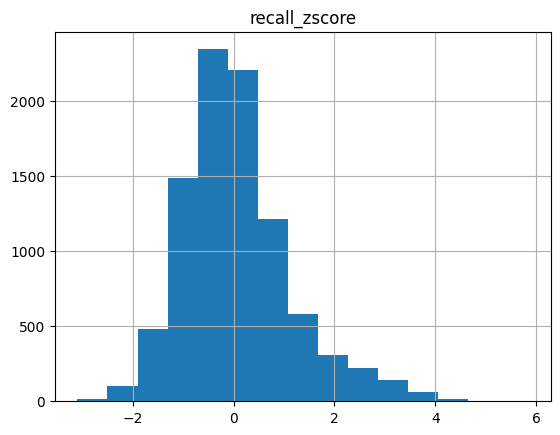

In [4]:
# ***RECALL MEMORABILITY***

# distribution of memorability scores after removing duplicates
filtered_df = df[['word', 'recall_zscore', 'recog_zscore']].drop_duplicates()
filtered_df[['recall_zscore']].hist(bins=15)

In [5]:
# ***RECALL MEMORABILITY***

# t-test comparisons for truerating groups
    # using rounded true rating and binarized true rating

pairs = list(itertools.combinations([-2, -1, 1, 2], 2))
for p in pairs:
    group1 = df[df['round_truerating'] == p[0]]
    group2 = df[df['round_truerating'] == p[1]]
    tstat = ttest_ind(group1['recall_zscore'], group2['recall_zscore'])
    print('t-stat for rounded_truerating = ' + str(p[0]) + ' and rounded_truerating = ' + str(p[1]) + ':')
    print(tstat)
    print()

            
group1 = df[df['bin_truerating'] == True]
group2 = df[df['bin_truerating'] == False]         
tstat = ttest_ind(group1['recall_zscore'], group2['recall_zscore'])
print('t-stat for binarized truerating groups :')
print(tstat)
print()


t-stat for rounded_truerating = -2 and rounded_truerating = -1:
TtestResult(statistic=-2.664620160473818, pvalue=0.007712424929514746, df=25279.0)

t-stat for rounded_truerating = -2 and rounded_truerating = 1:
TtestResult(statistic=-10.374232881966817, pvalue=3.519070065073993e-25, df=36738.0)

t-stat for rounded_truerating = -2 and rounded_truerating = 2:
TtestResult(statistic=-14.360572239700058, pvalue=1.200519673272961e-46, df=39341.0)

t-stat for rounded_truerating = -1 and rounded_truerating = 1:
TtestResult(statistic=-5.657152064637327, pvalue=1.5539096688154205e-08, df=28279.0)

t-stat for rounded_truerating = -1 and rounded_truerating = 2:
TtestResult(statistic=-8.703475917320743, pvalue=3.3756021203374375e-18, df=30882.0)

t-stat for rounded_truerating = 1 and rounded_truerating = 2:
TtestResult(statistic=-3.999576316328535, pvalue=6.356366366592583e-05, df=42341.0)

t-stat for binarized truerating groups :
TtestResult(statistic=15.262963295018615, pvalue=1.6290214039832575e

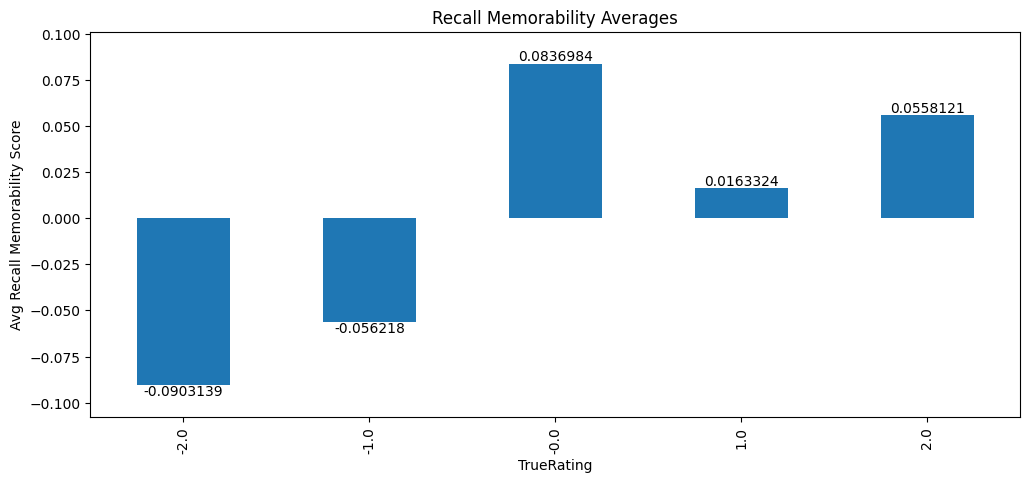

In [6]:
# ***RECALL MEMORABILITY***

# Bar chart with average scores for each rounded true rating group

bardf = df.groupby('round_truerating')['recall_zscore'].mean()

ax = bardf.plot(kind='bar', figsize=(12, 5), title='Recall Memorability Averages',
             xlabel='TrueRating', ylabel='Avg Recall Memorability Score', legend=False)

ax.bar_label(ax.containers[0], label_type='edge')

ax.margins(y=0.1)

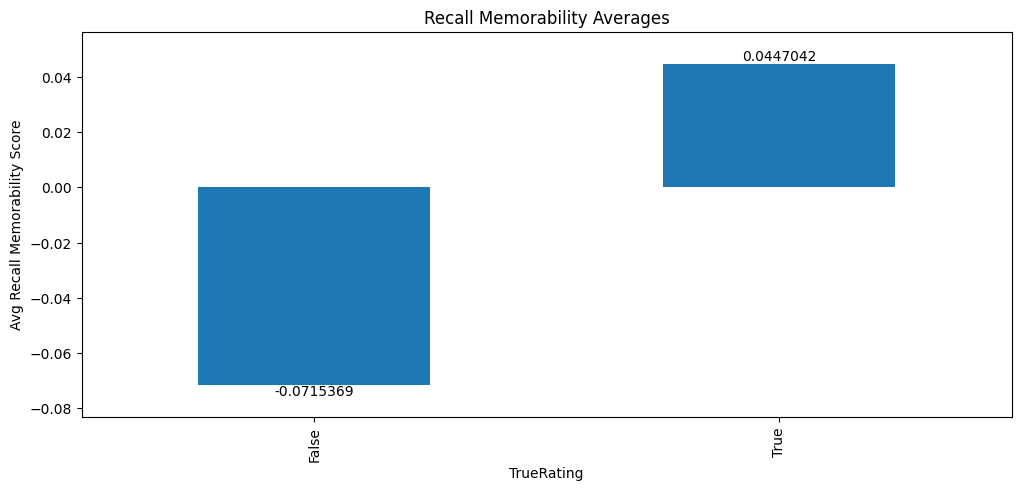

In [7]:
# ***RECALL MEMORABILITY***

# Bar chart with average scores for each binary true rating group

bardf = df.groupby('bin_truerating')['recall_zscore'].mean()

ax = bardf.plot(kind='bar', figsize=(12, 5), title='Recall Memorability Averages',
             xlabel='TrueRating', ylabel='Avg Recall Memorability Score', legend=False)

ax.bar_label(ax.containers[0], label_type='edge')

ax.margins(y=0.1)